In [1]:
import os
import re

import pandas as pd

In [5]:
base_dir = r"C:\datasets\RebarDSC"
images_path = os.path.join(base_dir, 'images')
annotations_path = os.path.join(base_dir, "annotations")

path_train_raw_csv = os.path.join(annotations_path, "100_percent_train.csv")

path_train_csv = os.path.join(annotations_path, "train.csv")

if os.path.exists(path_train_csv):
    df = pd.read_csv(path_train_csv)
else:
    df_train = pd.read_csv(path_train_raw_csv)
    f = open(path_train_csv, "r")
    rows = f.read().split("\n")
    rows = [r.split(",") for r in rows]
    rows = [[r[0]] + r[1].split(" ") for r in rows[:-1]]
    keys = ["filename", "bbox-0", "bbox-1", "bbox-2", "bbox-3"]
    df = pd.DataFrame([{keys[i]: r[i] for i in range(5)} for r in rows])
    df.to_csv(path_train_csv)
    del rows

In [24]:
from matplotlib import patches
import matplotlib.pyplot as plt
import cv2

def plot_img_with_bboxes(df: pd.DataFrame, fname: str,):
    bbox_cols = ['bbox-0', 'bbox-1', 'bbox-2', 'bbox-3']
    df_tmp = df[df['filename']==fname]
    print(df_tmp.shape)
    img = cv2.imread(os.path.join(images_path, fname),)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)
    for row in df_tmp[bbox_cols].to_dict('records'):
        x1, y1, x2, y2 = [row[c] for c in bbox_cols]
        w, h = x2-x1, y2-y1
        rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

(244, 6)


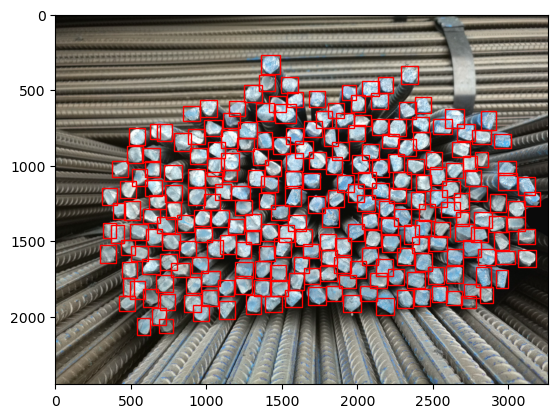

In [31]:
rgx = re.compile("^rebar.*")

images_fnames = [f for f in os.listdir(images_path) if rgx.match(f) ]

plot_img_with_bboxes(df=df, fname="rebar_15_12MM.jpg")#images_fnames[-200])